<a href="https://colab.research.google.com/github/Santiago-Olivera-Vaquero/Extracci-n-de-Caracteristicas/blob/main/Extracci%C3%B3n_de_Caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalar librería de analisis de variables categoricas

%pip install funpymodeling

In [ ]:
#Importación de librerias
import pandas as pd #Crea arreglos de datos
import numpy as np #Se encarga de operaciones aritmeticas
import matplotlib.pyplot as plt #Ayuda a crear graficos
from funpymodeling.exploratory import freq_tbl #Para variables categoricas

#Cargar Archivo csv
from google.colab import files
files.upload()

In [ ]:
#Mostrar primeros 2 renglones del dataframe de forma completa
data = pd.read_excel('microretailer_mit_lift_lab.xlsx')
pd.options.display.max_columns = None
data.head(2)

In [ ]:
#Verificar información del DataFrame

data.info()

**Preparación de Datos (Depuración de Valores Atipicos y Nulos)**

In [ ]:
#Obtener variables cuantitativas
Cuantitativas = data.select_dtypes(include=['int', 'float'])
Cuantitativas

In [ ]:
#Obtener variables cualitativas
Cualitativas = data.select_dtypes(include=['object'])
Cualitativas

In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

In [ ]:
#Verificar información de variables cualitativas
Cualitativas.info()

In [ ]:
#Identificar valores nulos por columnas en tabla de variables cuantitativas

valores_nulos = Cuantitativas.isnull().sum()
valores_nulos

In [ ]:
#Sustituir valores nulos numericos con promedio o media
Nulos = [3] + list(range(5,24)) #Se seleccionan la columna 3 y de la 5 a la 24 que involucran todos los valores nulos
Cuantitativas.iloc[:, Nulos] = Cuantitativas.iloc[:, Nulos].fillna(round(Cuantitativas.iloc[:, Nulos].mean(),1))
valores_nulos = Cuantitativas.isnull().sum()
valores_nulos

In [ ]:
#En el anterior paso no todos los valores Nulos desaparecieron
#Para las primeras 4 variables esto se debe a que la tabla tiene 171 renglones, de los cuales 171 tienen valores nulos, allí no se puede promediar nada
#Para evitar perder información, se aplica la sustitución a "NaN" para indicar que esos valores no fueron respondidos
#El whattsapp es un valor numerico pero no sirve como variable cuantitativa para analizar tendencias. Esto es debido a que es un numero de telefono por lo qu sirve mejor como una variable descriptiva del dato
#De nada sirve analizar si los numeros de telefono son mayores menores, etc

Cuantitativas[["271_card_fee", "273_platform_extra_charge", "275_platform_days_receive_money", "274_platform_fee", "236_whatsapp"]] = Cuantitativas[["271_card_fee", "273_platform_extra_charge", "275_platform_days_receive_money", "274_platform_fee", "236_whatsapp"]].fillna("NaN")
valores_nulos = Cuantitativas.isnull().sum()
valores_nulos

In [ ]:
#Se observa otra vez la información de las variables cuantitativas
#Se observa que las variables a las que se les aplicó el metodo sustitución "NaN" se vuelven objeto

Cuantitativas.info()

In [ ]:
#Se extraen las variables que se mantuvieron como cuantitativas de la tabla de variables cuantitativas

Cuantitativas2 = Cuantitativas.select_dtypes(include=['int', 'float'])
Cuantitativas2

In [ ]:
#Se revisa la información de la nueva tabla de cuantitativas

Cuantitativas2.info()

In [ ]:
#Diagrama de caja o bigote de cada columna del dataframe para revisión de valores Atipicos
fig = plt.figure(figsize =(15, 8))
Cuantitativas2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=Cuantitativas2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

In [ ]:
#Se depuran valores atipicos con los cuartiles encontrados anteriormente
Cuantitativas2 = Cuantitativas2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Cuantitativas2

In [ ]:
#Corroboramos valores nulos
valores_nulos=Cuantitativas2.isnull().sum()
valores_nulos

In [ ]:
#Se rellenan los valores nulos que se generarón con la depuración de valores atipicos con el metodo de media

Cuantitativas2=Cuantitativas2.fillna(round(Cuantitativas2.mean(),1))
Cuantitativas2

In [ ]:
#Corroboramos valores nulos
valores_nulos=Cuantitativas2.isnull().sum()
valores_nulos

In [ ]:
#Diagrama de caja o bigote de cada columna del dataframe para observar datos cuantitativos con valores atipicos depurados
fig = plt.figure(figsize =(15, 8))
Cuantitativas2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Se extraen las variables que se convirtieron en cualitativas de las variables cuantitativas

Cuantitativas3 = Cuantitativas.select_dtypes(include=['object'])
Cuantitativas3.info()

In [ ]:
#Se unen las variables que originalmente eran cuantitativas

Cuantitativas = pd.concat([Cuantitativas3,Cuantitativas2], axis=1)
Cuantitativas.info()

In [ ]:
#Se revisa la información de las variables cualitativas

Cualitativas.info()

In [ ]:
#Sa aplica la sustitución NaN a variables cualitativas para eliminar valores nulos

Cualitativas = Cualitativas.fillna("NaN")
valores_nulos = Cualitativas.isnull().sum()
valores_nulos

In [ ]:
#Se juntan las variables cuantitativas y las cualitativas

data_procesada = pd.concat([Cuantitativas,Cualitativas], axis=1)
data_procesada.info()

**Extracción de Caracteristicas**

In [ ]:
#Se muestran los datos procesados

pd.options.display.max_columns = None
data_procesada.head(2)

In [ ]:
#Se obtiene una tabla de frecuencias para cada una de las variables

freq_tbl(data_procesada)

In [ ]:
#Se obtienen tablas de frecuencia para las 20 variables categoricas que vamos a analizar

tabla1 = freq_tbl(data_procesada["_title"])
tabla2 = freq_tbl(data_procesada["_updated_by"])
tabla3 = freq_tbl(data_procesada["232_type_of_store"])
tabla4 = freq_tbl(data_procesada["108_does_the_micro_retailer_has_a_barred_window_"])
tabla5 = freq_tbl(data_procesada["99_does_the_micro_retailer_exhibits_products_outside_"])
tabla6 = freq_tbl(data_procesada["102_does_the_micro_retailer_sells_fresh_products_"])
tabla7 = freq_tbl(data_procesada["184_store_devices"])
tabla8 = freq_tbl(data_procesada["hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz"])
tabla9 = freq_tbl(data_procesada["le_comento_que_toda_esta_informacin_es_confidencial"])
tabla10 = freq_tbl(data_procesada["5_change_store_space_last_year"])
tabla11 = freq_tbl(data_procesada["6_change_employees_average_salary_last_year"])
tabla12 = freq_tbl(data_procesada["20_reviews_finances_monthly"])
tabla13 = freq_tbl(data_procesada["49_inventory_records"])
tabla14 = freq_tbl(data_procesada["18_sales_records"])
tabla15 = freq_tbl(data_procesada["155_sales_registers_used_for"])
tabla16 = freq_tbl(data_procesada["19_tax_id"])
tabla17 = freq_tbl(data_procesada["310_burnout"])
tabla18 = freq_tbl(data_procesada["186_internet_connection"])
tabla19 = freq_tbl(data_procesada["210_sales_channels"])
tabla20 = freq_tbl(data_procesada["189_payment_methods"])

In [ ]:
tabla1

In [ ]:
tabla1 = tabla1[tabla1['frequency']>1]
tabla1 = tabla1.set_index('_title')
tabla1

,frequency,percentage,cumulative_perc
_title,,,
"November 9, 2022",73,0.426901,0.426901
"November 10, 2022",26,0.152047,0.578947
"November 7, 2022",20,0.116959,0.695906
"November 3, 2022",16,0.093567,0.789474
"November 12, 2022",15,0.087719,0.877193
"November 8, 2022",10,0.058480,0.935673
"November 4, 2022",9,0.052632,0.988304


Text(0, 0.5, 'Frecuencia')

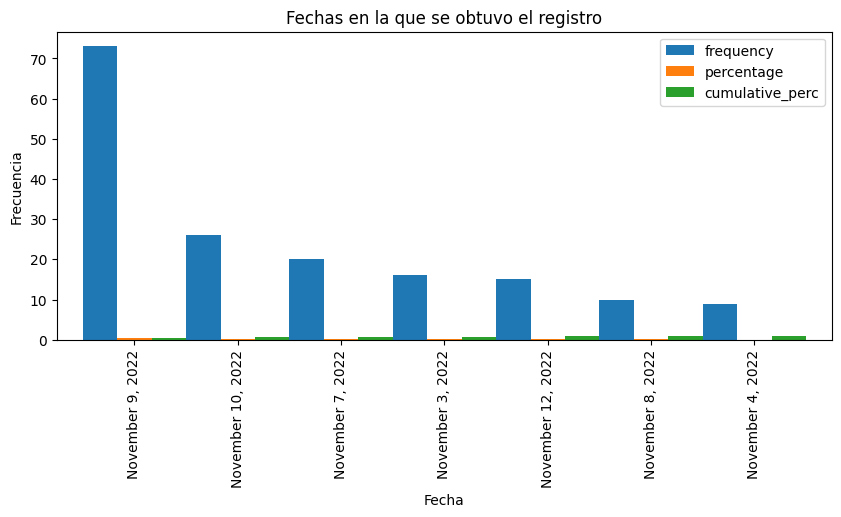

In [ ]:
#Grafico de barras

tabla1.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Fechas en la que se obtuvo el registro')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')

In [ ]:
tabla2

In [ ]:
tabla2 = tabla2[tabla2['frequency']>1]
tabla2 = tabla2.set_index('_updated_by')
tabla2

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


Text(0, 0.5, 'Frecuencia')

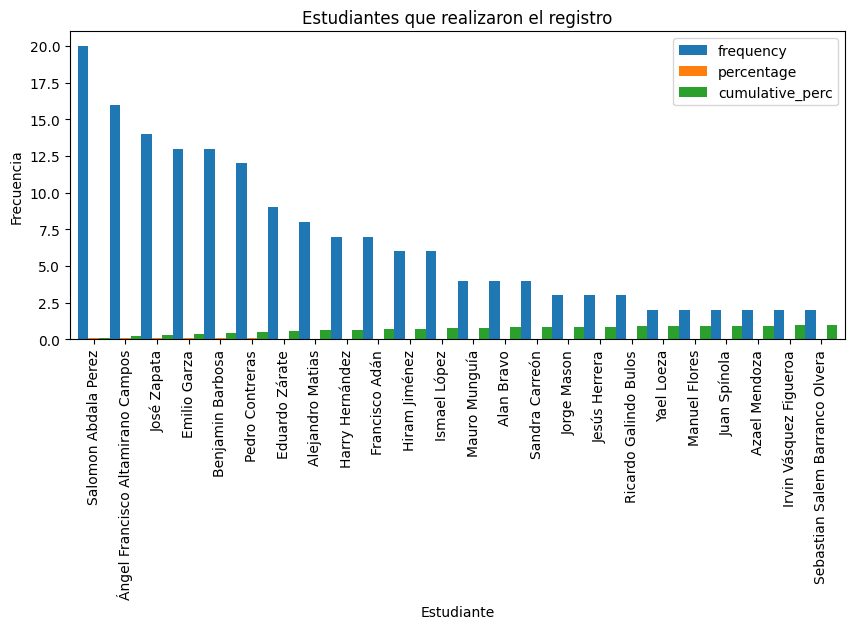

In [ ]:
tabla2.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Estudiantes que realizaron el registro')
plt.xlabel('Estudiante')
plt.ylabel('Frecuencia')

In [ ]:
tabla3

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [ ]:
tabla3 = tabla3[tabla3['cumulative_perc']<0.81]
tabla3 = tabla3.set_index('232_type_of_store')
tabla3

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


Text(0, 0.5, 'Frecuencia')

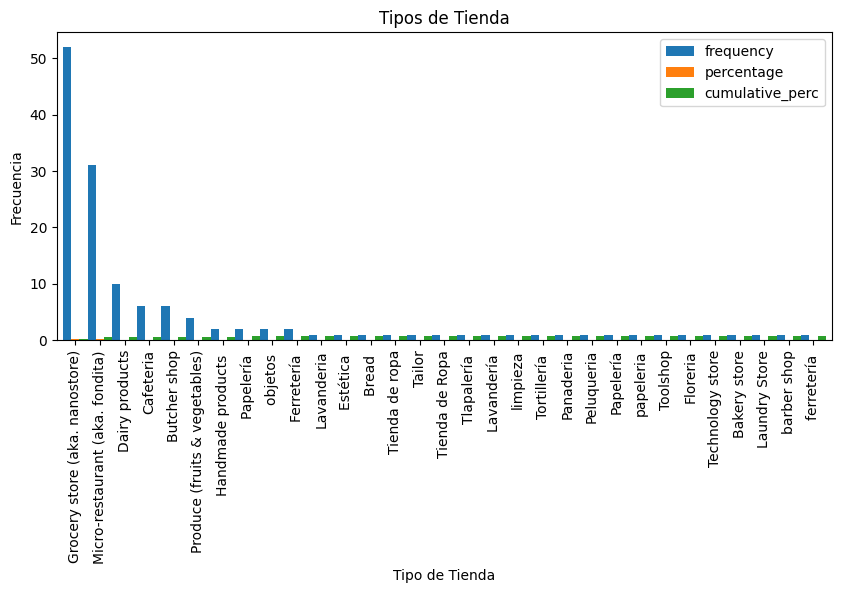

In [ ]:
tabla3.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Tipos de Tienda')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Frecuencia')

In [ ]:
tabla4

In [ ]:
tabla4 = tabla4[tabla4['frequency']>1]
tabla4 = tabla4.set_index('108_does_the_micro_retailer_has_a_barred_window_')
tabla4

,frequency,percentage,cumulative_perc
108_does_the_micro_retailer_has_a_barred_window_,,,
no,124,0.725146,0.725146
yes,47,0.274854,1.000000


Text(0, 0.5, 'Frecuencia')

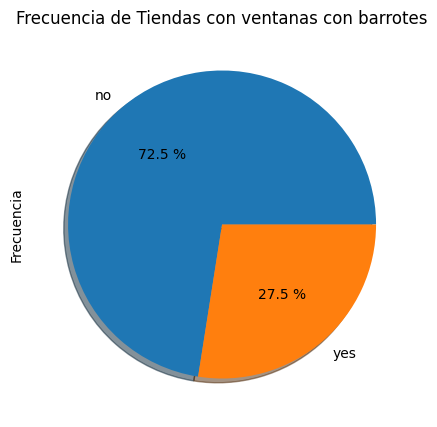

In [ ]:
tabla4["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Frecuencia de Tiendas con ventanas con barrotes')
plt.ylabel('Frecuencia')

In [ ]:
tabla5

In [ ]:
tabla5 = tabla5.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
tabla5

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


Text(0, 0.5, 'Frecuencia')

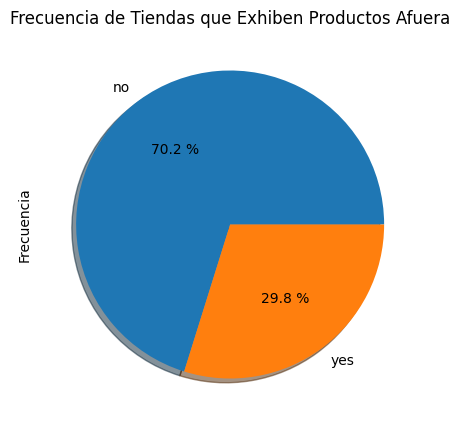

In [ ]:
tabla5["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Frecuencia de Tiendas que Exhiben Productos Afuera')
plt.ylabel('Frecuencia')

In [ ]:
tabla6

In [ ]:
tabla6 = tabla6.set_index('102_does_the_micro_retailer_sells_fresh_products_')
tabla6

,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
no,105,0.614035,0.614035
yes,66,0.385965,1.000000


Text(0, 0.5, 'Frecuencia')

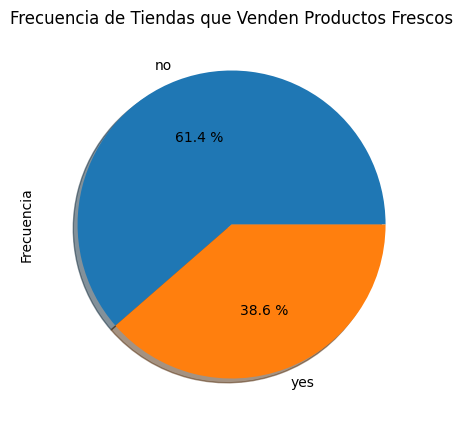

In [ ]:
tabla6["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Frecuencia de Tiendas que Venden Productos Frescos')
plt.ylabel('Frecuencia')

In [ ]:
tabla7

In [ ]:
tabla7 = tabla7[tabla7['frequency']>2]
tabla7 = tabla7.set_index('184_store_devices')
tabla7

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.619883
Security cameras,5,0.029240,0.649123
"POS system (i.e. computer + bar code scanner + printer),Security cameras,Smartphone",4,0.023392,0.672515


Text(0, 0.5, 'Frecuencia')

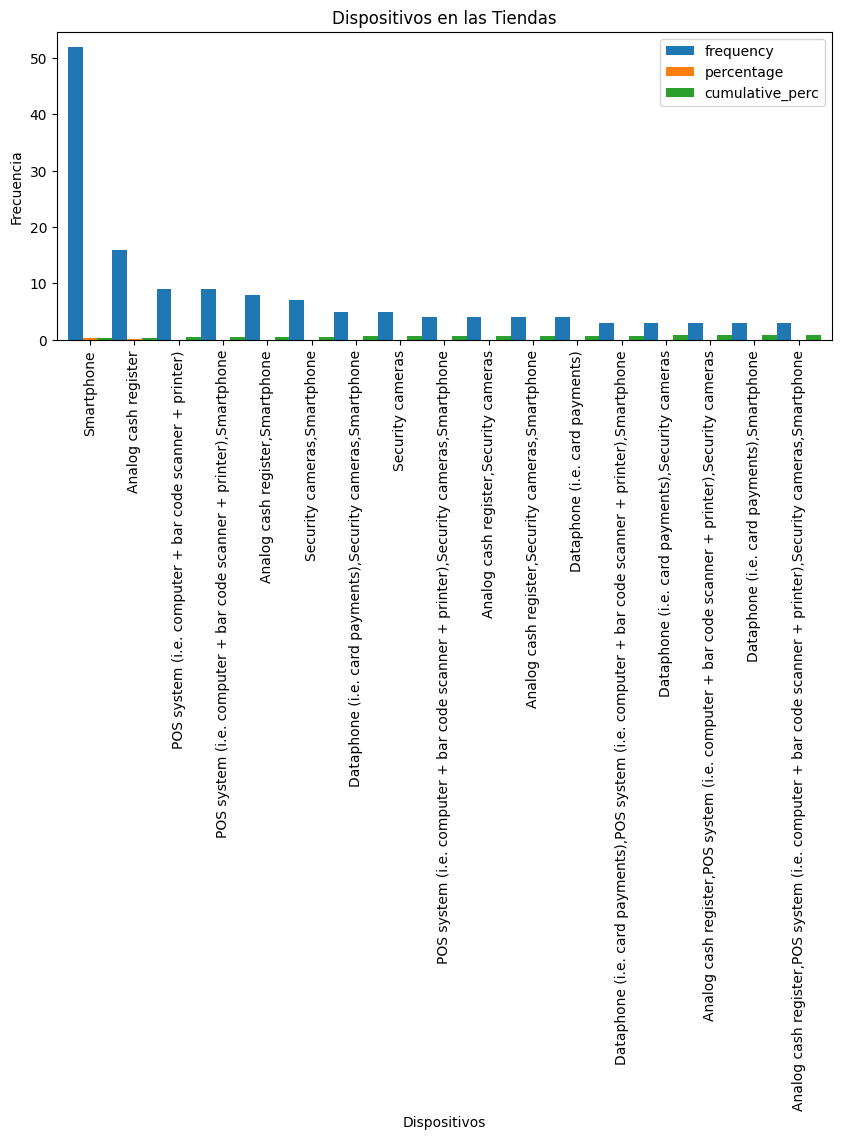

In [ ]:
tabla7.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Dispositivos en las Tiendas')
plt.xlabel('Dispositivos')
plt.ylabel('Frecuencia')

In [ ]:
tabla8

In [ ]:
tabla8 = tabla8.set_index('hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz')
tabla8

,frequency,percentage,cumulative_perc
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,,,
yes,113,0.660819,0.660819
no,58,0.339181,1.000000


Text(0, 0.5, 'Frecuencia')

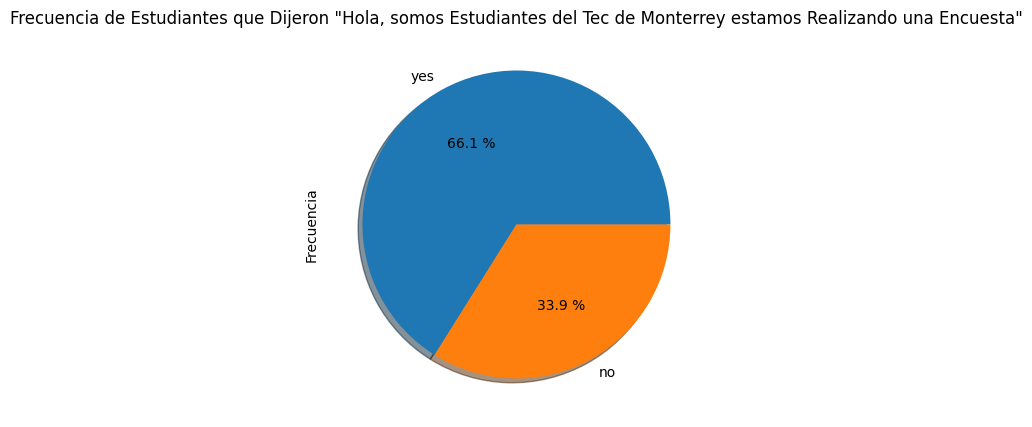

In [ ]:
tabla8["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Frecuencia de Estudiantes que Dijeron "Hola, somos Estudiantes del Tec de Monterrey estamos Realizando una Encuesta"')
plt.ylabel('Frecuencia')

In [ ]:
tabla9

In [ ]:
tabla9 = tabla9.set_index('le_comento_que_toda_esta_informacin_es_confidencial')
tabla9

,frequency,percentage,cumulative_perc
le_comento_que_toda_esta_informacin_es_confidencial,,,
yes,164,0.959064,0.959064
no,7,0.040936,1.000000


Text(0, 0.5, 'Frecuencia')

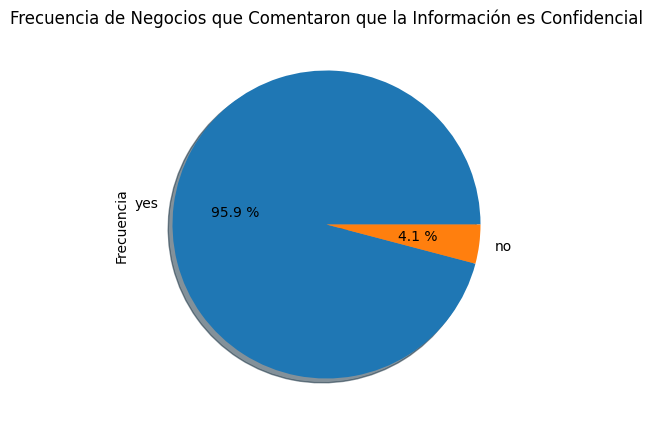

In [ ]:
tabla9["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Frecuencia de Negocios que Comentaron que la Información es Confidencial')
plt.ylabel('Frecuencia')

In [ ]:
tabla10

In [ ]:
tabla10 = tabla10.set_index('5_change_store_space_last_year')
tabla10

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,72,0.421053,0.421053
NaN,72,0.421053,0.842105
Disminuyó 15%,9,0.052632,0.894737
Aumentó 25%,7,0.040936,0.935673
Aumentó 15%,4,0.023392,0.959064
Aumentó 50% o más,4,0.023392,0.982456
Disminuyó 25%,2,0.011696,0.994152
Disminuyó 50% o más,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

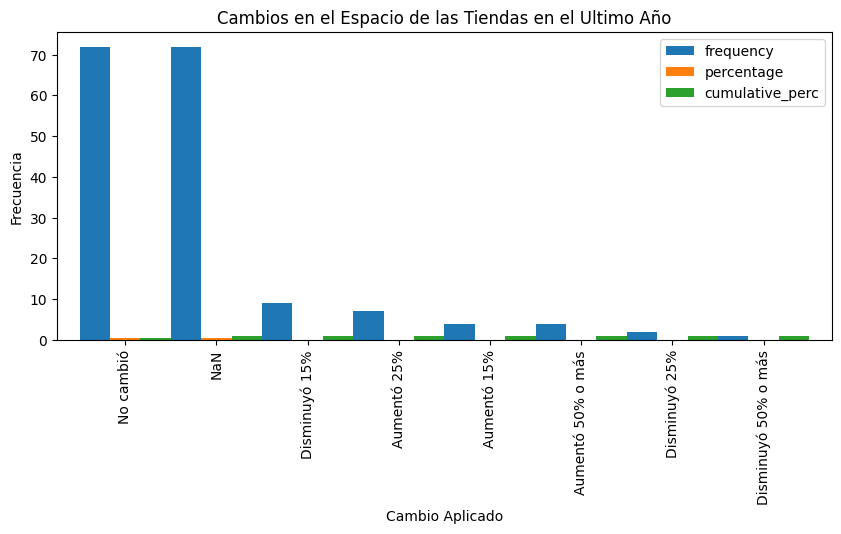

In [ ]:
tabla10.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Cambios en el Espacio de las Tiendas en el Ultimo Año')
plt.xlabel('Cambio Aplicado')
plt.ylabel('Frecuencia')

In [ ]:
tabla11

In [ ]:
tabla11 = tabla11[tabla11['frequency']>1]
tabla11 = tabla11.set_index('6_change_employees_average_salary_last_year')
tabla11

,frequency,percentage,cumulative_perc
6_change_employees_average_salary_last_year,,,
NaN,86,0.502924,0.502924
No cambió,50,0.292398,0.795322
Aumentó 15%,14,0.081871,0.877193
Disminuyó 15%,5,0.029240,0.906433
Aumentó 25%,4,0.023392,0.929825
Aumentó 50% o más,4,0.023392,0.953216
Disminuyó 25%,3,0.017544,0.970760


Text(0, 0.5, 'Frecuencia')

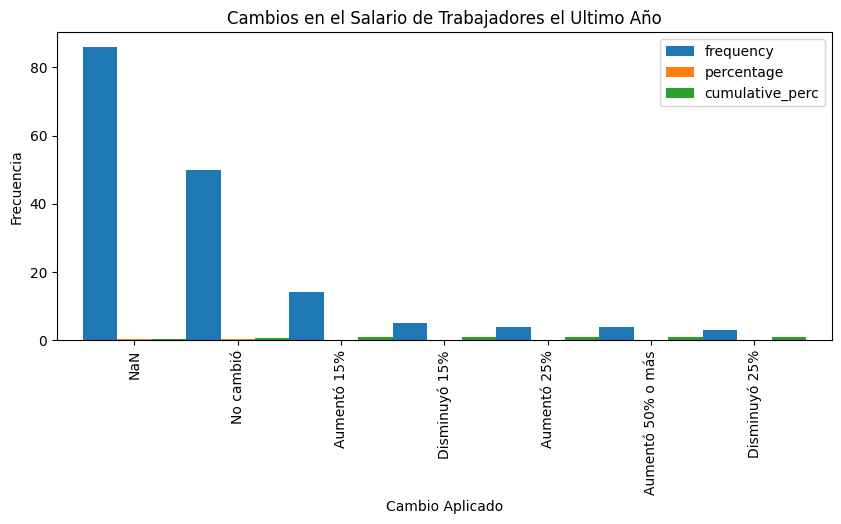

In [ ]:
tabla11.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Cambios en el Salario de Trabajadores el Ultimo Año')
plt.xlabel('Cambio Aplicado')
plt.ylabel('Frecuencia')

In [ ]:
tabla12

In [ ]:
tabla12 = tabla12.set_index('20_reviews_finances_monthly')
tabla12

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,79,0.461988,0.461988
NaN,63,0.368421,0.830409
no,29,0.169591,1.000000


Text(0, 0.5, 'Frecuencia')

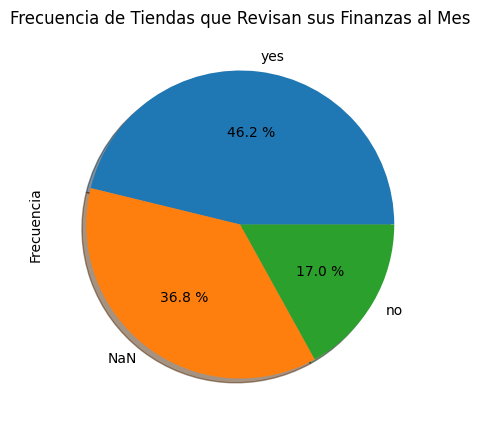

In [ ]:
tabla12["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Frecuencia de Tiendas que Revisan sus Finanzas al Mes')
plt.ylabel('Frecuencia')

In [ ]:
tabla13

In [ ]:
tabla13 = tabla13[tabla13['frequency']>1]
tabla13 = tabla13.set_index('49_inventory_records')
tabla13

,frequency,percentage,cumulative_perc
49_inventory_records,,,
NaN,61,0.356725,0.356725
En papel,40,0.233918,0.590643
Software especializado + computadora,21,0.122807,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673
"En Excel,En papel",7,0.040936,0.976608


Text(0, 0.5, 'Frecuencia')

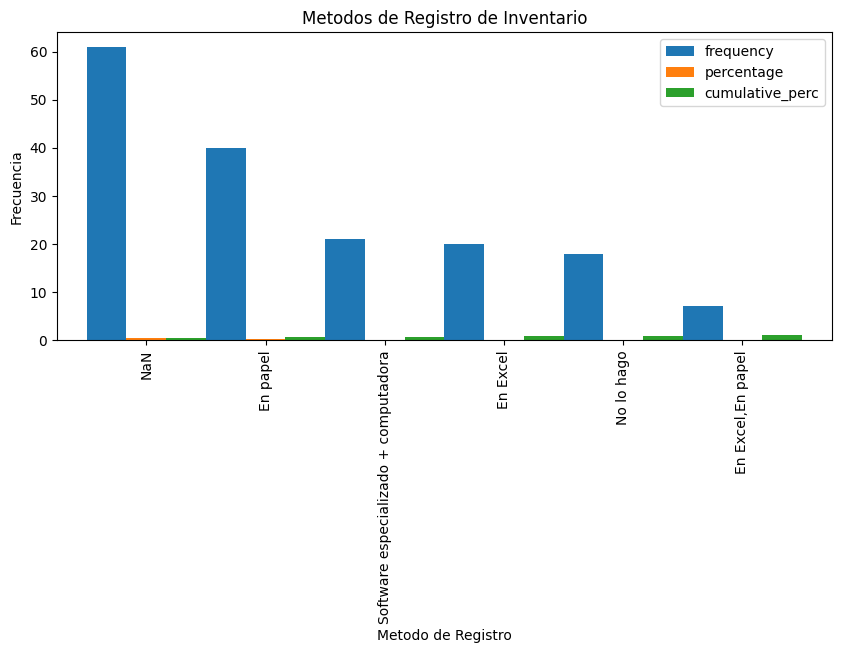

In [ ]:
tabla13.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Metodos de Registro de Inventario')
plt.xlabel('Metodo de Registro')
plt.ylabel('Frecuencia')

In [ ]:
tabla14

In [ ]:
tabla14 = tabla14[tabla14['frequency']>1]
tabla14 = tabla14.set_index('18_sales_records')
tabla14

,frequency,percentage,cumulative_perc
18_sales_records,,,
NaN,61,0.356725,0.356725
En papel,47,0.274854,0.631579
Software especializado + computadora,22,0.128655,0.760234
No lo hago,14,0.081871,0.842105
En Excel,10,0.058480,0.900585
Caja registradora (análoga),4,0.023392,0.923977
"En Excel,En papel",4,0.023392,0.947368


Text(0, 0.5, 'Frecuencia')

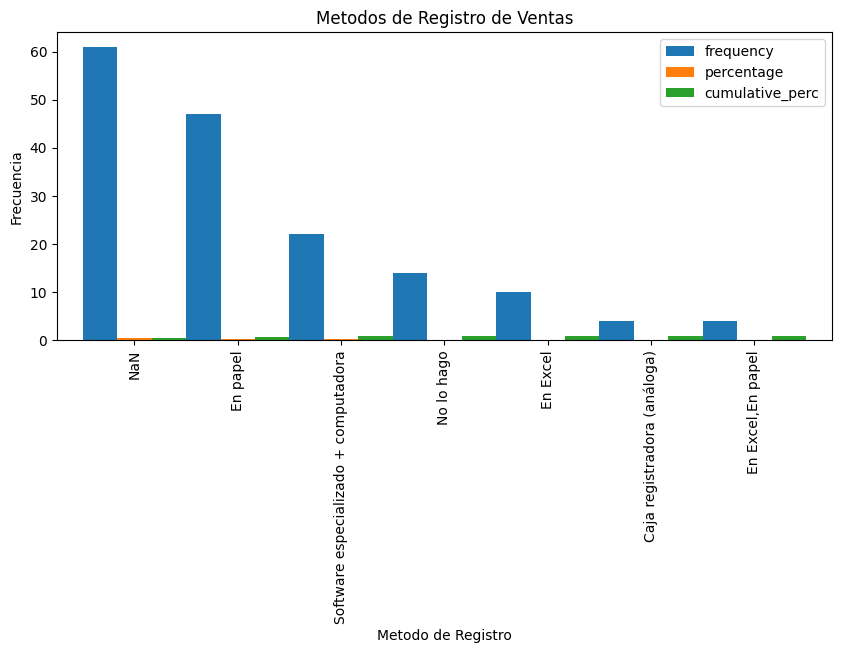

In [ ]:
tabla14.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Metodos de Registro de Ventas')
plt.xlabel('Metodo de Registro')
plt.ylabel('Frecuencia')

In [ ]:
tabla15

In [ ]:
tabla15 = tabla15.set_index('155_sales_registers_used_for')
tabla15

,frequency,percentage,cumulative_perc
155_sales_registers_used_for,,,
NaN,165,0.964912,0.964912
No los uso,4,0.023392,0.988304
Se lleva al día,1,0.005848,0.994152
PEPS,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

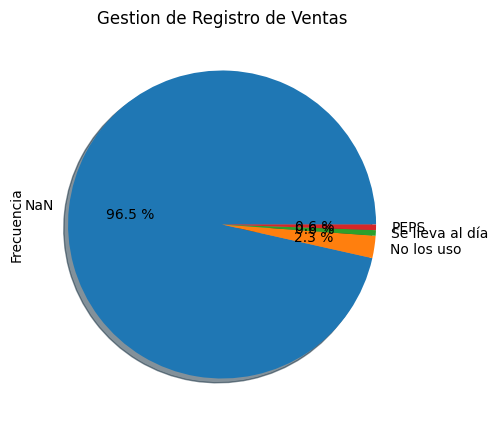

In [ ]:
tabla15["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Gestion de Registro de Ventas')
plt.ylabel('Frecuencia')

In [ ]:
tabla16

In [ ]:
tabla16 = tabla16.set_index('19_tax_id')
tabla16

,frequency,percentage,cumulative_perc
19_tax_id,,,
NaN,71,0.415205,0.415205
yes,70,0.409357,0.824561
no,30,0.175439,1.000000


Text(0, 0.5, 'Frecuencia')

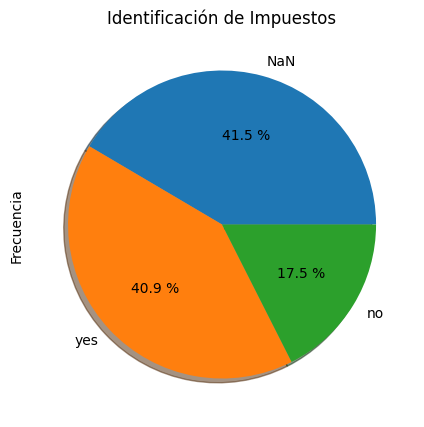

In [ ]:
tabla16["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Identificación de Impuestos')
plt.ylabel('Frecuencia')

In [ ]:
tabla17

In [ ]:
tabla17 = tabla17.set_index('310_burnout')
tabla17

,frequency,percentage,cumulative_perc
310_burnout,,,
no,68,0.397661,0.397661
NaN,64,0.374269,0.771930
yes,39,0.228070,1.000000


Text(0, 0.5, 'Frecuencia')

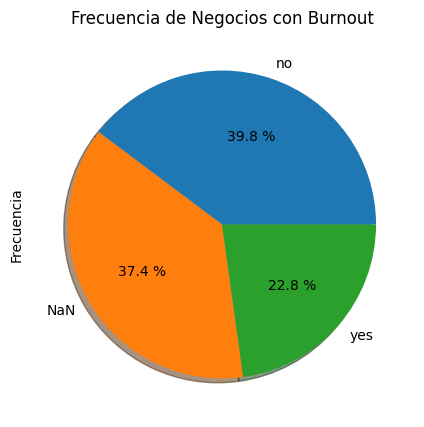

In [ ]:
tabla17["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Frecuencia de Negocios con Burnout')
plt.ylabel('Frecuencia')

In [ ]:
tabla18

In [ ]:
tabla18 = tabla18.set_index('186_internet_connection')
tabla18

,frequency,percentage,cumulative_perc
186_internet_connection,,,
yes,76,0.444444,0.444444
NaN,63,0.368421,0.812865
no,32,0.187135,1.000000


Text(0, 0.5, 'Frecuencia')

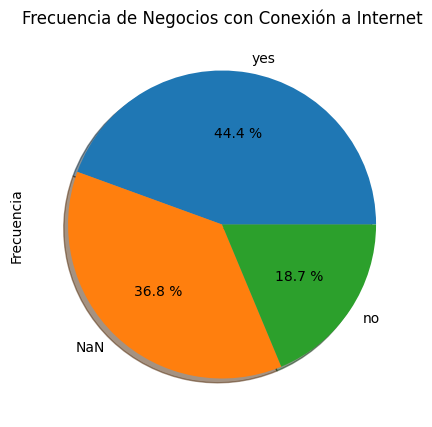

In [ ]:
tabla18["frequency"].plot(kind="pie", figsize = (10,5), shadow = True, autopct="%.1f %%")
plt.title('Frecuencia de Negocios con Conexión a Internet')
plt.ylabel('Frecuencia')

In [ ]:
tabla19

In [ ]:
tabla19 = tabla19[tabla19['frequency']>1]
tabla19 = tabla19.set_index('210_sales_channels')
tabla19

,frequency,percentage,cumulative_perc
210_sales_channels,,,
NaN,89,0.520468,0.520468
"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
WhatsApp,10,0.058480,0.643275
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",9,0.052632,0.695906
Llamada a Teléfono fijo,6,0.035088,0.730994
"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
Llamada a Teléfono celular,5,0.029240,0.795322
"Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp",5,0.029240,0.824561
"Llamada a Teléfono celular,Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram),WhatsApp",3,0.017544,0.842105


Text(0, 0.5, 'Frecuencia')

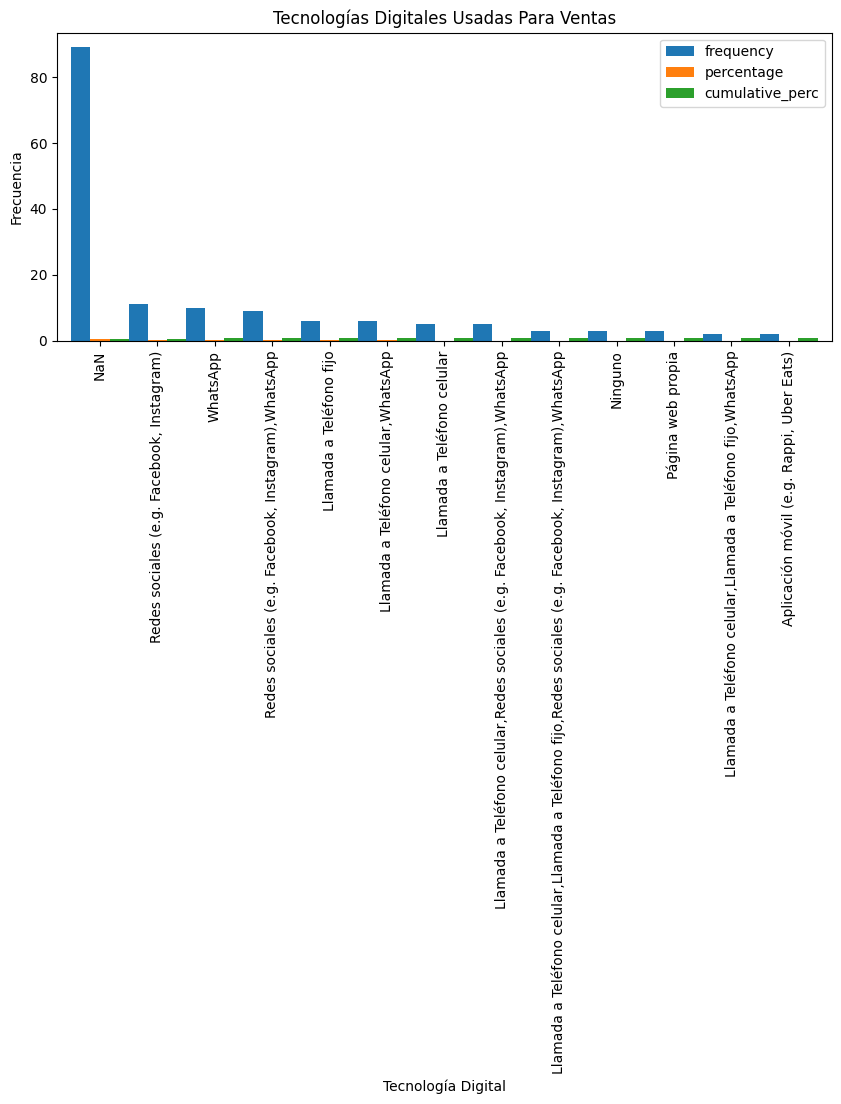

In [ ]:
tabla19.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Tecnologías Digitales Usadas Para Ventas')
plt.xlabel('Tecnología Digital')
plt.ylabel('Frecuencia')

In [ ]:
tabla20

In [ ]:
tabla20 = tabla20.set_index('189_payment_methods')
tabla20

,frequency,percentage,cumulative_perc
189_payment_methods,,,
NaN,64,0.374269,0.374269
Efectivo,40,0.233918,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",1,0.005848,0.988304
"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria,Trueque (e.g. comercio o intercambio)",1,0.005848,0.994152
Tarjeta de débito y/o crédito,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

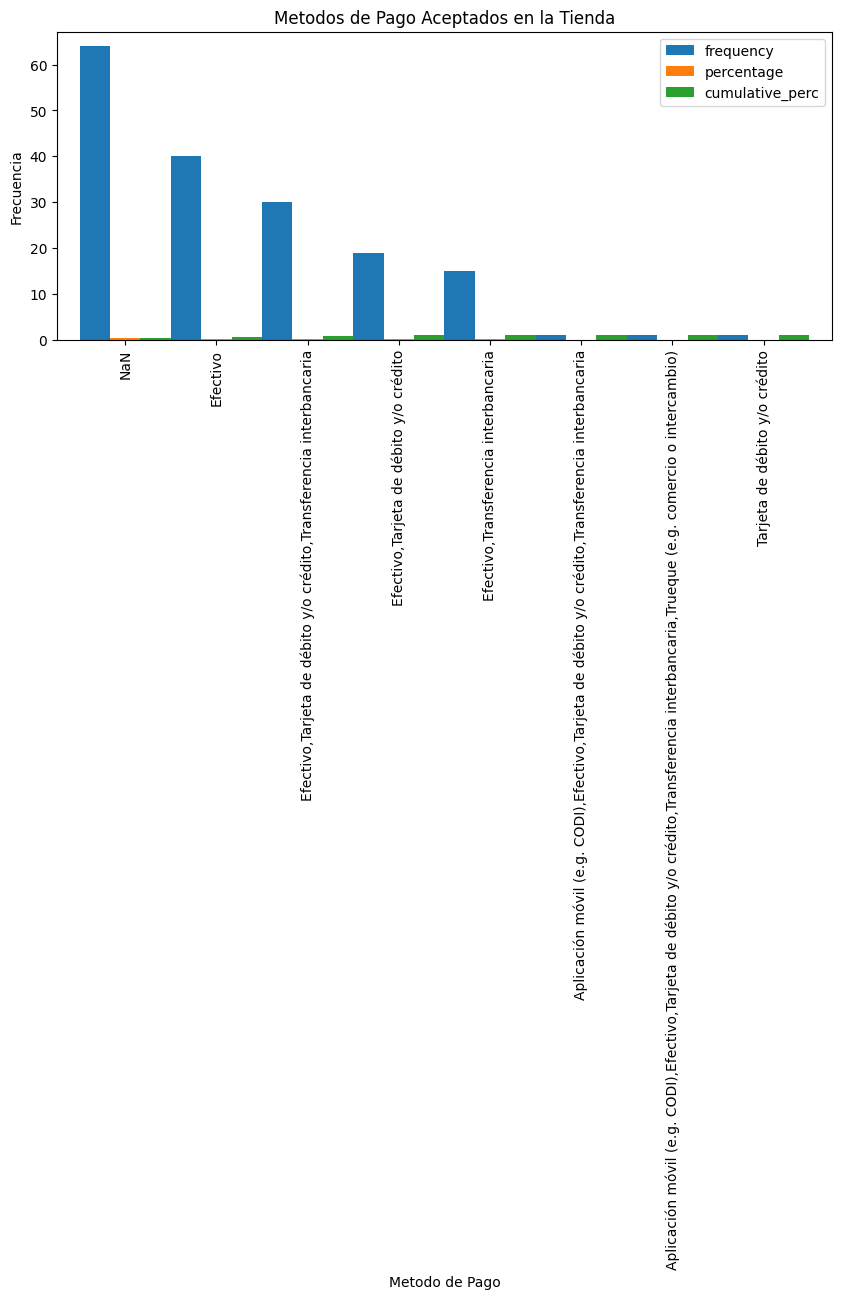

In [ ]:
tabla20.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Metodos de Pago Aceptados en la Tienda')
plt.xlabel('Metodo de Pago')
plt.ylabel('Frecuencia')